In [1]:
'''
试图模仿https://mne.tools/stable/auto_tutorials/stats-sensor-space/20_erp_stats.html

进行全部 channel  和 时间点  的t-test

基本单元：某个时间点，某个channel，  所有被试数据是否差异显著。

'''

'\n试图模仿https://mne.tools/stable/auto_tutorials/stats-sensor-space/20_erp_stats.html\n\n进行全部 channel  和 时间点  的t-test\n\n基本单元：某个时间点，某个channel，  所有被试数据是否差异显著。\n\n'

In [1]:
%matplotlib qt

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

import mne
from mne.channels import find_ch_adjacency, make_1020_channel_selections
from mne.stats import spatio_temporal_cluster_test

np.random.seed(0)

##数据读入 读入的是 clear过的epochs

T1_sub_ids = [
            'prex006'  ]

T2M_sub_ids = [
            'prex006M' ]

T2S_sub_ids = [
            'prex006S' ]

T2M_sub_ids = [
            'prex006','prex009','prex010','prex011','prex012',
            'prex015','prex016','prex017','prex018','prex019','prex022','prex023',
            'prex026','prex027','prex028'
            ,'prex033','prex037','prex038','prex040',
            'prex041','prex042','prex044','prex045',
            'prex046','prex047','prex048','prex049','prex050','prex052',
            'prex034','prex043','prex035'
            ]
#去掉了 5和9被试
T1_sub_ids = [
            'prex006M','prex009M','prex010M','prex011M','prex012M',
            'prex015M','prex016M','prex017M','prex018M','prex019M','prex022M','prex023M',
            'prex026M','prex027M','prex028M'
            ,'prex033M','prex037M','prex038M','prex040S'
             ,'prex041M','prex042M','prex044M','prex045M'
             ,'prex046M','prex047M','prex048M','prex049S','prex050M','prex052M',
            'prex034M','prex043M','prex035M'
            ]

T2S_sub_ids = [
            'prex006S','prex009S','prex010S','prex011S','prex012S',
            'prex015S','prex016S','prex017S','prex018S','prex019S','prex022S','prex023S',
            'prex026S','prex027S','prex028S'
            ,'prex033S','prex037S','prex038S','prex040M'
            ,'prex041S','prex042S','prex044S','prex045S'
            ,'prex046S','prex047S','prex048S','prex049M','prex050S','prex052S',
            'prex034S','prex043S','prex035S'
            ]
data_path = 'E:\Python LYW\RSA\spaced_learning\pre10\\analysis\data\\6epoch_clean\\'

list_epochs_T1S = list()
list_epochs_T2S = list()
list_epochs_T2M = list()

for sub_id in T1_sub_ids:
    fname = data_path + sub_id + '-epo.fif'
    epochs = mne.read_epochs(fname)

    list_epochs_T1S.append(epochs)

for sub_id in T2S_sub_ids:
    fname = data_path + sub_id + '-epo.fif'
    epochs = mne.read_epochs(fname)
    list_epochs_T2S.append(epochs)

for sub_id in T2M_sub_ids:
    fname = data_path + sub_id + '-epo.fif'
    epochs = mne.read_epochs(fname)
    list_epochs_T2M.append(epochs)



Reading E:\Python LYW\RSA\spaced_learning\pre10\analysis\data\6epoch_clean\prex006M-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
47 matching events found
No baseline correction applied
0 projection items activated
Reading E:\Python LYW\RSA\spaced_learning\pre10\analysis\data\6epoch_clean\prex009M-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
44 matching events found
No baseline correction applied
0 projection items activated
Reading E:\Python LYW\RSA\spaced_learning\pre10\analysis\data\6epoch_clean\prex010M-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
48 matching events found
No baseline correction applied
0 p

In [3]:
T1S = list_epochs_T1S[0]
T2M = list_epochs_T2M[0]
T2S = list_epochs_T2S[0]

In [4]:
# 测试一下 MultiIndex 多级别的目录
# from pandas import Series,DataFrame
# import numpy as np
# import pandas as pd
# df4 = DataFrame(np.random.randint(0,150,size=(8,12)),
#                columns = pd.MultiIndex.from_product([['模拟考','正式考'],
#                                                    ['数学','语文','英语','物理','化学','生物']]),
#                index = pd.MultiIndex.from_product([['期中','期末'],
#                                                    ['雷军','李斌'],
#                                                   ['测试一','测试二']]))

In [5]:
# 这个pandas用得好棒啊

#进行统计的时间窗口选择，这和路路的decoding代码有相同的设置，并不是对全时间段进行统计
time_windows = ((.2, .25), (.35, .45))
# 选择进行观测的 channel
elecs = ["Fz", "Cz", "Pz"]
index = ['condition', 'epoch', 'time']

#想要把被试信息也加进去怎么做呢？
# display the EEG data in Pandas format (first 5 rows)
# print(epochs.to_data_frame(index=index)[elecs].head())

T1S_df_sub = list_epochs_T1S[0].copy().to_data_frame(index=index)

idx = 0
new_col = [7, 8, 9]  # can be a list, a Series, an array or a scalar
T1S_df_sub.insert(loc=idx, column='sub_id',value = 0)

s = T1S_df_sub.assign(sub_id=0).set_index('sub_id',append=True)

print(s[elecs].head())

channel                            Fz        Cz        Pz
condition epoch time sub_id                              
102       0     -200 0      -0.140017  0.883836  2.491307
                -198 0       0.178587  0.792291  2.077539
                -196 0       0.266127  0.765862  1.741531
                -194 0       0.123166  0.821307  1.496582
                -192 0      -0.229004  0.967028  1.343529


In [6]:
## 这段代码可以借用的，抽取想要的时间段，想要的channel
report = "{elec}, time: {tmin}-{tmax} s; t({df})={t_val:.3f}, p={p:.3f}"
print("\nTargeted statistical test results:")
##这里的意思是，两种时间段都给你搞出来。。可以的

T1S_df_sub = list_epochs_T1S[0].copy().to_data_frame(index=index)
T1S_df_sub.insert(loc=idx, column='sub_id',value = 0)
#造一个，但是这个方法会导致，多一个出来。。
T1S_df = T1S_df_sub.assign(sub_id=0).set_index('sub_id',append=True)


T2S_df_sub = list_epochs_T2S[0].copy().to_data_frame(index=index)
T2S_df_sub.insert(loc=idx, column='sub_id',value = 0)
#造一个，但是这个方法会导致，多一个出来。。
T2S_df = T2S_df_sub.assign(sub_id=0).set_index('sub_id',append=True)

for (tmin, tmax) in time_windows:

    for i_subs in range(len(list_epochs_T1S)):
        T1S_df_sub = list_epochs_T1S[i_subs].copy().crop(tmin, tmax).to_data_frame(index=index)
        #添加一个level
        T1S_df_sub.insert(loc=idx, column='sub_id',value = i_subs)
        T1S_df_sub = T1S_df_sub.assign(sub_id=i_subs).set_index('sub_id',append=True)
        #合并到一起
        T1S_df = T1S_df.append(T1S_df_sub)


    # T1S_df = T1S.copy().crop(tmin, tmax).to_data_frame(index=index)
    # T2S_df = T2S.copy().crop(tmin, tmax).to_data_frame(index=index)
    for i_subs in range(len(list_epochs_T2S)):
        T2S_df_sub = list_epochs_T2S[i_subs].copy().crop(tmin, tmax).to_data_frame(index=index)
        #添加一个level
        T2S_df_sub.insert(loc=idx, column='sub_id',value = i_subs)
        T2S_df_sub = T2S_df_sub.assign(sub_id=i_subs).set_index('sub_id',append=True)
        #合并到一起
        T2S_df = T2S_df.append(T2S_df_sub)

    for elec in elecs:
        # extract data
        # 这里的平均是？保留是condition，是单词。。那么被试看来就被压缩掉了?
        # 应该不是其他全压缩，而是这个维度上压缩了，比如 某个 被试的这个condition被压缩。
        # 被试信息应该还是保留着的。
        A = T1S_df[elec].groupby("sub_id").mean()
        B = T2S_df[elec].groupby("sub_id").mean()

        # conduct t test
        # 这里的 A B是series，为什么呢？channel去哪里了？
        # 你可以看到 elec in elecs,所以得到的应该是单独的。
        t, p = ttest_ind(A, B)

        # display results
        format_dict = dict(elec=elec, tmin=tmin, tmax=tmax,
                           df=len(epochs.events) - 2, t_val=t, p=p)
        print(report.format(**format_dict))




Targeted statistical test results:
Fz, time: 0.2-0.25 s; t(38)=-0.684, p=0.496
Cz, time: 0.2-0.25 s; t(38)=-0.633, p=0.529
Pz, time: 0.2-0.25 s; t(38)=-0.337, p=0.737
Fz, time: 0.35-0.45 s; t(38)=-0.738, p=0.463
Cz, time: 0.35-0.45 s; t(38)=-0.439, p=0.662
Pz, time: 0.35-0.45 s; t(38)=0.036, p=0.971


In [7]:
# 这里是找cluster，关键点就是 重复 矫正。

# Calculate adjacency matrix between sensors from their locations
adjacency, _ = find_ch_adjacency(T1S.info, "eeg")

Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 63


In [8]:
#前面是单个被试的 epochs 来做统计的

#想要构造一个新的X，是由evoked代替，怎么做呢？
#数据读入就要重新来

T1_sub_ids = [
            'prex006','prex009','prex010','prex011','prex012',
            'prex015','prex016','prex017','prex018','prex019','prex022','prex023',
            'prex026','prex027','prex028'
            ,'prex033','prex037','prex038','prex040',
            'prex041','prex042','prex044','prex045',
            'prex046','prex047','prex048','prex049','prex050','prex052',

            ]
#去掉了 5和9被试
T2M_sub_ids = [
            'prex006M','prex009M','prex010M','prex011M','prex012M',
            'prex015M','prex016M','prex017M','prex018M','prex019M','prex022M','prex023M',
            'prex026M','prex027M','prex028M'
            ,'prex033M','prex037M','prex038M','prex040S'
             ,'prex041M','prex042M','prex044M','prex045M'
             ,'prex046M','prex047M','prex048M','prex049S','prex050M','prex052M',

            ]

T2S_sub_ids = [
            'prex006S','prex009S','prex010S','prex011S','prex012S',
            'prex015S','prex016S','prex017S','prex018S','prex019S','prex022S','prex023S',
            'prex026S','prex027S','prex028S'
            ,'prex033S','prex037S','prex038S','prex040M'
            ,'prex041S','prex042S','prex044S','prex045S'
            ,'prex046S','prex047S','prex048S','prex049M','prex050S','prex052S',

            ]

T1_sub_ids = [
    'prex006','prex009','prex010','prex011','prex012',
    'prex015','prex016','prex017','prex018','prex019','prex022','prex023',
    'prex027','prex028',
    'prex033','prex037','prex038','prex040',
    'prex041','prex042','prex044','prex045',
    'prex046','prex047','prex048','prex049','prex050','prex052','prex051'
]
#去掉了 5和9被
T2M_sub_ids = [
    'prex006M','prex009M','prex010M','prex011M','prex012M',
    'prex015M','prex016M','prex017M','prex018M','prex019M','prex022M','prex023M',
    'prex027M','prex028M',
    'prex033M','prex037M','prex038M','prex040S',
    'prex041M','prex042M','prex044M','prex045M'
    ,'prex046M','prex047M','prex048M','prex049S','prex050M','prex052M','prex051M'

]

T2S_sub_ids = [
    'prex006S','prex009S','prex010S','prex011S','prex012S',
    'prex015S','prex016S','prex017S','prex018S','prex019S','prex022S','prex023S',
    'prex027S','prex028S'
    ,'prex033S','prex037S','prex038S','prex040M'
    ,'prex041S','prex042S','prex044S','prex045S'
    ,'prex046S','prex047S','prex048S','prex049M','prex050S','prex052S','prex051S'
]
data_path = 'E:\Python LYW\RSA\spaced_learning\pre10\\analysis\\data\\7evoked\\'

list_evoked_T1S = list()
list_evoked_T2S = list()
list_evoked_T2M = list()

for sub_id in T1_sub_ids:
    fname = data_path + sub_id + '-ave.fif'
    evoked = mne.read_evokeds(fname)[0]
    list_evoked_T1S.append(evoked)

for sub_id in T2S_sub_ids:
    fname = data_path + sub_id + '-ave.fif'
    evoked = mne.read_evokeds(fname)[0]
    list_evoked_T2S.append(evoked)

for sub_id in T2M_sub_ids:
    fname = data_path + sub_id + '-ave.fif'
    evoked = mne.read_evokeds(fname)[0]
    list_evoked_T2M.append(evoked)

#造出evoked的数据 被试个数*63*501
# 这里比较的是 一次  和   分散
evokeddata_T1S = np.zeros([len(list_evoked_T1S),63, 501], dtype=np.float32)
evokeddata_T2S = np.zeros([len(list_evoked_T2S),63, 501], dtype=np.float32)
for i_evoked in range(1,len(list_evoked_T1S)):
    evokeddata_T1S[i_evoked,:,:] = list_evoked_T1S[i_evoked].data
    evokeddata_T2S[i_evoked,:,:] = list_evoked_T2S[i_evoked].data

X = [evokeddata_T1S.transpose(0, 2, 1),
     evokeddata_T2S.transpose(0, 2, 1)]
tfce = dict(start=.2, step=.2)

# Calculate statistical thresholds
t_obs, clusters, cluster_pv, h0 = spatio_temporal_cluster_test(
    X, tfce, adjacency=adjacency,
    n_permutations=100)  # a more standard number would be 1000+

#关键的就是找到 差异显著的点，后面的section仅仅是作图的问题了。

significant_points = cluster_pv.reshape(t_obs.shape).T < .1
print(str(significant_points.sum()) + " points selected by TFCE ...")

Reading E:\Python LYW\RSA\spaced_learning\pre10\analysis\data\7evoked\prex006-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (101)
        0 CTF compensation matrices available
        nave = 48 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] sec)
Reading E:\Python LYW\RSA\spaced_learning\pre10\analysis\data\7evoked\prex009-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (101)
        0 CTF compensation matrices available
        nave = 39 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading E:\Python LYW\RSA\spaced_learning\pre10\analysis\data\7evoked\prex010-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (101)
        0 CTF compensation matrices available
        nave = 

  0%|          |  : 0/99 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
0 points selected by TFCE ...


In [9]:
'''
这里是在前面代码的基础上做了差异波，因为理论上你应该比较的对象是

ERP(spaced-once) VS ERP(massed-once)

所以需要做一个差异波。
'''


#前面是单个被试的 epochs 来做统计的

#想要构造一个新的X，是由evoked代替，怎么做呢？
#数据读入就要重新来



T1_sub_ids = [
    'prex006','prex009','prex010','prex011','prex012',
    'prex015','prex016','prex017','prex018','prex019','prex022','prex023',
    'prex026','prex027','prex028'
    ,'prex033','prex037','prex038','prex040',
    'prex041','prex042','prex044','prex045',
    'prex046','prex047','prex048','prex049','prex050','prex052',

]
#去掉了 5和9被试
T2M_sub_ids = [
    'prex006M','prex009M','prex010M','prex011M','prex012M',
    'prex015M','prex016M','prex017M','prex018M','prex019M','prex022M','prex023M',
    'prex026M','prex027M','prex028M'
    ,'prex033M','prex037M','prex038M','prex040S'
    ,'prex041M','prex042M','prex044M','prex045M'
    ,'prex046M','prex047M','prex048M','prex049S','prex050M','prex052M',

]

T2S_sub_ids = [
    'prex006S','prex009S','prex010S','prex011S','prex012S',
    'prex015S','prex016S','prex017S','prex018S','prex019S','prex022S','prex023S',
    'prex026S','prex027S','prex028S'
    ,'prex033S','prex037S','prex038S','prex040M'
    ,'prex041S','prex042S','prex044S','prex045S'
    ,'prex046S','prex047S','prex048S','prex049M','prex050S','prex052S',

]

T1_sub_ids = [
    'prex006','prex009','prex010','prex011','prex012',
    'prex015','prex016','prex017','prex018','prex019','prex022','prex023',
    'prex027','prex028',
    'prex033','prex037','prex038','prex040',
    'prex041','prex042','prex044','prex045',
    'prex046','prex047','prex048','prex049','prex050','prex052','prex051'
]
#去掉了 5和9被
T2M_sub_ids = [
    'prex006M','prex009M','prex010M','prex011M','prex012M',
    'prex015M','prex016M','prex017M','prex018M','prex019M','prex022M','prex023M',
    'prex027M','prex028M',
    'prex033M','prex037M','prex038M','prex040S',
    'prex041M','prex042M','prex044M','prex045M'
    ,'prex046M','prex047M','prex048M','prex049S','prex050M','prex052M','prex051M'

]

T2S_sub_ids = [
    'prex006S','prex009S','prex010S','prex011S','prex012S',
    'prex015S','prex016S','prex017S','prex018S','prex019S','prex022S','prex023S',
    'prex027S','prex028S'
    ,'prex033S','prex037S','prex038S','prex040M'
    ,'prex041S','prex042S','prex044S','prex045S'
    ,'prex046S','prex047S','prex048S','prex049M','prex050S','prex052S','prex051S'
]
data_path = 'E:\Python LYW\RSA\spaced_learning\pre10\\analysis\\data\\7evoked\\'

list_evoked_T1S = list()
list_evoked_T2S = list()
list_evoked_T2M = list()

for sub_id in T1_sub_ids:
    fname = data_path + sub_id + '-ave.fif'
    evoked = mne.read_evokeds(fname)[0]
    list_evoked_T1S.append(evoked)

for sub_id in T2S_sub_ids:
    fname = data_path + sub_id + '-ave.fif'
    evoked = mne.read_evokeds(fname)[0]
    list_evoked_T2S.append(evoked)

for sub_id in T2M_sub_ids:
    fname = data_path + sub_id + '-ave.fif'
    evoked = mne.read_evokeds(fname)[0]
    list_evoked_T2M.append(evoked)

#造出evoked的数据 被试个数*63*501
# 这里比较的是 一次  和   分散
evokeddata_T1S = np.zeros([len(list_evoked_T1S),63, 501], dtype=np.float32)
evokeddata_T2S = np.zeros([len(list_evoked_T2S),63, 501], dtype=np.float32)
evokeddata_T2M = np.zeros([len(list_evoked_T2M),63, 501], dtype=np.float32)
for i_evoked in range(1,len(list_evoked_T1S)):
    evokeddata_T1S[i_evoked,:,:] = list_evoked_T1S[i_evoked].data
    evokeddata_T2S[i_evoked,:,:] = list_evoked_T2S[i_evoked].data
    evokeddata_T2M[i_evoked,:,:] = list_evoked_T2M[i_evoked].data

# 想要得到差异波的数据ERP数据
evokeddata_T2ST1S = evokeddata_T2S - evokeddata_T1S
evokeddata_T2MT1S = evokeddata_T2M - evokeddata_T1S

X = [evokeddata_T2ST1S.transpose(0, 2, 1),
     evokeddata_T2MT1S.transpose(0, 2, 1)]
tfce = dict(start=.2, step=.2)

# Calculate statistical thresholds
t_obs, clusters, cluster_pv, h0 = spatio_temporal_cluster_test(
    X, tfce, adjacency=adjacency,
    n_permutations=100)  # a more standard number would be 1000+

#关键的就是找到 差异显著的点，后面的section仅仅是作图的问题了。

significant_points = cluster_pv.reshape(t_obs.shape).T < .1
print(str(significant_points.sum()) + " points selected by TFCE ...")


Reading E:\Python LYW\RSA\spaced_learning\pre10\analysis\data\7evoked\prex006-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (101)
        0 CTF compensation matrices available
        nave = 48 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] sec)
Reading E:\Python LYW\RSA\spaced_learning\pre10\analysis\data\7evoked\prex009-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (101)
        0 CTF compensation matrices available
        nave = 39 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading E:\Python LYW\RSA\spaced_learning\pre10\analysis\data\7evoked\prex010-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (101)
        0 CTF compensation matrices available
        nave = 

  0%|          |  : 0/99 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
0 points selected by TFCE ...


In [12]:
# We need an evoked object to plot the image to be masked
# 这个mask是怎么回事
evoked = mne.combine_evoked([T1S.average(), T2S.average()],
                            weights=[1, -1])  # calculate difference wave
time_unit = dict(time_unit="s")
evoked.plot_joint(title="Long vs. short words", ts_args=time_unit,
                  topomap_args=time_unit)  # show difference wave

# Create ROIs by checking channel labels
selections = make_1020_channel_selections(evoked.info)

# Visualize the results
fig, axes = plt.subplots(nrows=3, figsize=(8, 8))
axes = {sel: ax for sel, ax in zip(selections, axes.ravel())}
evoked.plot_image(axes=axes, group_by=selections, colorbar=False, show=False,
                  mask=significant_points, show_names="all", titles=None,
                  **time_unit)
plt.colorbar(axes["Left"].images[-1], ax=list(axes.values()), shrink=.3,
             label="µV")

plt.show()

No projector specified for this dataset. Please consider the method self.add_proj.


Identifying common channels ...
Identifying common channels ...


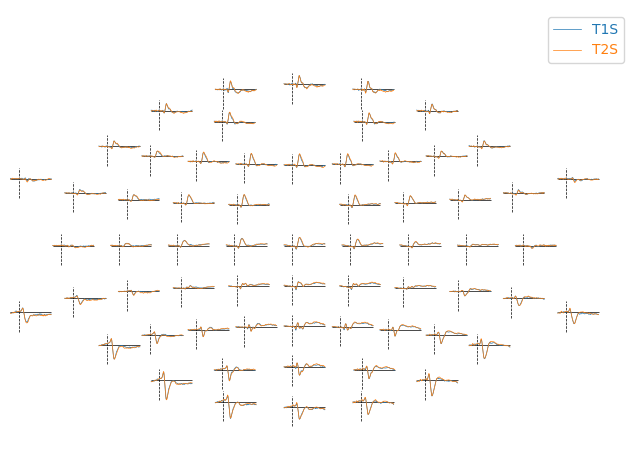

In [11]:
%matplotlib qt
from mne.viz import plot_evoked_topo
grand_average_T1S = mne.grand_average(list_evoked_T1S)
grand_average_T1S.comment = 'T1S'
grand_average_T1S.plot()

grand_average_T2S = mne.grand_average(list_evoked_T2S)
grand_average_T2S.comment = 'T2S'
grand_average_T2S.plot()

plot_evoked_topo([grand_average_T1S, grand_average_T2S], legend=True)